In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
import sys
import numpy as np
import pandas as pd
import torch
import pyvista as pv

sys.path.append('../..')
import project
import project.preprocessing
from project.core.utils import pprint

torch.cuda.is_available()

True

In [3]:
%autoreload
ds = project.datasets.shapenet.ShapeNetDataset(data_root='../../data/ShapeNetSem')
pprint(ds, max_depth=1)

ShapeNetDataset()
├── root:       PosixPath('../../data/ShapeNetSem')
├── metadata:   DataFrame(shape=(12288, 16))
├── categories: DataFrame(shape=(283, 5))
├── materials:  DataFrame(shape=(343, 3))
├── densities:  DataFrame(shape=(19, 3))
└── taxonomy:   dict(len=2)


In [4]:
import project.preprocessing.texturing
tex = project.preprocessing.texturing.load_annotations('2025-10-25_annotations.csv')
tex

,idx,path,annotation,is_texture,is_duplicate,poor_quality,bad_shape,inverted,material
0,18231,/ocean/projects/asc170022p/mtragoza/lung-proje...,carpet,True,False,False,False,False,NaN
1,17033,/ocean/projects/asc170022p/mtragoza/lung-proje...,marble,True,False,False,False,False,PorousHard
2,18752,/ocean/projects/asc170022p/mtragoza/lung-proje...,wood,True,False,True,False,False,NaN
3,17435,/ocean/projects/asc170022p/mtragoza/lung-proje...,cardboard,False,False,False,False,False,NaN
4,3048,/ocean/projects/asc170022p/mtragoza/lung-proje...,wood,True,True,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...
109,42,/ocean/projects/asc170022p/mtragoza/lung-proje...,wood,True,True,False,False,False,NaN
110,12807,/ocean/projects/asc170022p/mtragoza/lung-proje...,wood,True,True,False,False,False,NaN
111,5066,/ocean/projects/asc170022p/mtragoza/lung-proje...,wood,True,False,False,True,False,NaN
112,5531,/ocean/projects/asc170022p/mtragoza/lung-proje...,leather,True,False,False,False,False,DenseMedium


In [8]:
%autoreload
# wss.101354f9d8dede686f7b08d9de913afe - speaker
# wss.1e5abf0465d97d826118a17db9de8c0  - bottle
# wss.fabf4f7a56f75781c9c120e7b18610ad - donut
# wss.38c6a54843046bef5bbc469684caa508 - disconnected
# wss.ce4945cde785aecb478fa0ab37c461c6 - piano

subj = 'wss.fabf4f7a56f75781c9c120e7b18610ad'
ex = next(ds.examples(subjects=[subj], variant='TEST'))
pprint(ex, max_depth=3)

Example()
├── dataset:  'ShapeNet'
├── subject:  'wss.fabf4f7a56f75781c9c120e7b18610ad'
├── variant:  'TEST'
├── paths:    dict(len=12)
|   ├── 'source_mesh':   PosixPath('../../data/ShapeNetSem/models-OBJ/models/fabf4f7a56f75781c9c120e7b18610ad.obj')
|   ├── 'source_mask':   PosixPath('../../data/ShapeNetSem/models-binvox-solid/fabf4f7a56f75781c9c120e7b18610ad.binvox')
|   ├── 'surface_mesh':  PosixPath('../../data/ShapeNetSem/TEST/fabf4f7a56f75781c9c120e7b18610ad/meshes/surface.xdmf')
|   ├── 'binary_mask':   PosixPath('../../data/ShapeNetSem/TEST/fabf4f7a56f75781c9c120e7b18610ad/masks/binary.nii.gz')
|   ├── 'region_mask':   PosixPath('../../data/ShapeNetSem/TEST/fabf4f7a56f75781c9c120e7b18610ad/masks/regions.nii.gz')
|   ├── 'volume_mesh':   PosixPath('../../data/ShapeNetSem/TEST/fabf4f7a56f75781c9c120e7b18610ad/meshes/volume.xdmf')
|   ├── 'material_mask': PosixPath('../../data/ShapeNetSem/TEST/fabf4f7a56f75781c9c120e7b18610ad/masks/material.nii.gz')
|   ├── 'density_field': Posix

# Visualize object mesh

In [269]:
cam

Camera (0x1530a76d6a40)
  Position:            (18702.918462510883, -10509.728328912795, 23292.29211386067)
  Focal Point:         (2297.255, 7573.075, 4954.26)
  Parallel Projection: False
  Distance:            30535.50378962642
  Thickness:           32648.686741176756
  Parallel Scale:      7903.169932555544
  Clipping Range:      (16279.111800827577, 48927.79854200433)
  View Angle:          30.0
  Roll:                -83.2042247415969

Loading ../../data/ShapeNetSem/models-OBJ/models/fabf4f7a56f75781c9c120e7b18610ad.obj


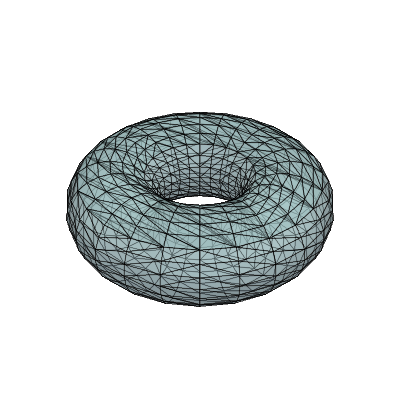

In [271]:
%autoreload
import project.visual.pyvista as pv

src_mesh = project.core.fileio.load_meshio(ex.paths['source_mesh'])

size = 400
p = pv.pv.Plotter(window_size=[size,size])
pv.plot_mesh(src_mesh, color='lightblue', show_edges=True, opacity=0.5, plotter=p)
pv.plot_mesh(src_mesh, style='wireframe', color='black', opacity=0.5, plotter=p)
cam = p.camera
p.show(jupyter_backend='static')

In [368]:
clim

(0, 6)

Loading ../../data/ShapeNetSem/models-OBJ/models/fabf4f7a56f75781c9c120e7b18610ad.obj


2025-10-31 02:26:18.541 (13255.881s) [    1531DCC77200] vtkEGLRenderWindow.cxx:674   WARN| vtkEGLRenderWindow (0x56198e360080): Unable to eglMakeCurrent: 12291
2025-10-31 02:26:18.593 (13255.934s) [    1531DCC77200] vtkEGLRenderWindow.cxx:674   WARN| vtkEGLRenderWindow (0x56198e360080): Unable to eglMakeCurrent: 12291
2025-10-31 02:26:18.649 (13255.990s) [    1531DCC77200] vtkEGLRenderWindow.cxx:674   WARN| vtkEGLRenderWindow (0x56198e360080): Unable to eglMakeCurrent: 12291
2025-10-31 02:26:18.736 (13256.077s) [    1531DCC77200] vtkEGLRenderWindow.cxx:674   WARN| vtkEGLRenderWindow (0x56198e44d320): Unable to eglMakeCurrent: 12291
2025-10-31 02:26:18.820 (13256.161s) [    1531DCC77200] vtkEGLRenderWindow.cxx:674   WARN| vtkEGLRenderWindow (0x56198e6d2220): Unable to eglMakeCurrent: 12291


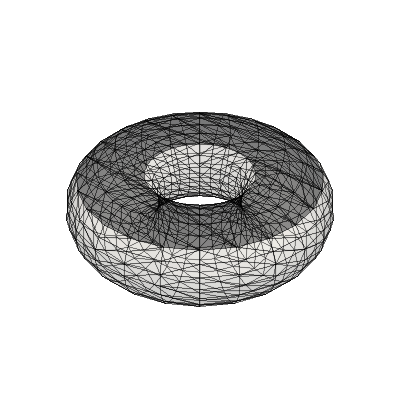

In [444]:
scene = project.core.fileio.load_trimesh(ex.paths['source_mesh'])
label_mesh, mesh_labels = project.preprocessing.surface_meshing.extract_face_labels(scene)
label_mesh = pv.pv.wrap(label_mesh)
label_mesh.cell_data['label'] = mesh_labels

size = 400
p = pv.pv.Plotter(window_size=[size,size])
pv.plot_mesh(label_mesh, scalar='label', cmap=['white', 'black', 'black'], show_edges=True, opacity=0.25, plotter=p, show_scalar_bar=False)
pv.plot_mesh(src_mesh, style='wireframe', color='black', opacity=0.5, plotter=p)
p.camera = cam
p.show(jupyter_backend='static')

# Preprocess binary mask

In [154]:
%autoreload
project.preprocessing.api.preprocess_binary_mask(
    mask_path=ex.paths['source_mask'],
    mesh_path=ex.paths['source_mesh'],
    output_path=ex.paths['binary_mask']
)

Loading ../../data/ShapeNetSem/models-binvox-solid/fabf4f7a56f75781c9c120e7b18610ad.binvox
Loading ../../data/ShapeNetSem/models-OBJ/models/fabf4f7a56f75781c9c120e7b18610ad.obj
Inferring affine from mesh bounding box
Binvox shape:     [128 128 128]
Binvox translate: [ 3131.66 -2144.15 -3079.76]
Binvox scale:     9.20993e-05
Points bbox min:    [-3131.66  2144.15  3079.76]
Points bbox extent: [10857.83 10857.85  3749.  ]
(-1, -1)
[[ 8.48269205e+01  0.00000000e+00  0.00000000e+00 -3.08924654e+03]
 [ 0.00000000e+00  8.48269205e+01  0.00000000e+00  2.18656346e+03]
 [ 0.00000000e+00  0.00000000e+00  8.48269205e+01  3.12217346e+03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Cleaning up binary mask
Filtering foreground
Input 1-connected components: 2
  Voxel counts:   [395096      1] 395097
Output 1-connected components: 1
  Voxels dropped: 1 (0.0003%)
Filtering background
Input 1-connected components: 5
  Voxel counts:   [1702052       1       1       1       1] 1702

Loading ../../data/ShapeNetSem/TEST/fabf4f7a56f75781c9c120e7b18610ad/masks/binary.nii.gz


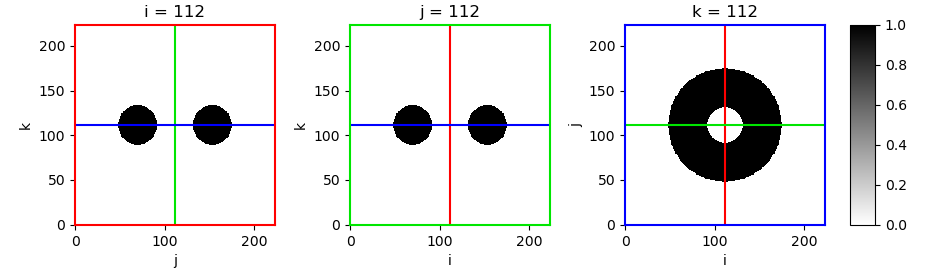

In [158]:
bin_nifti = project.core.fileio.load_nibabel(ex.paths['binary_mask'])
bin_mask, bin_affine = bin_nifti.get_fdata(), bin_nifti.affine

_ = project.visual.matplotlib.show_image_slices(bin_mask, cmap='binary', clim=(0,1))

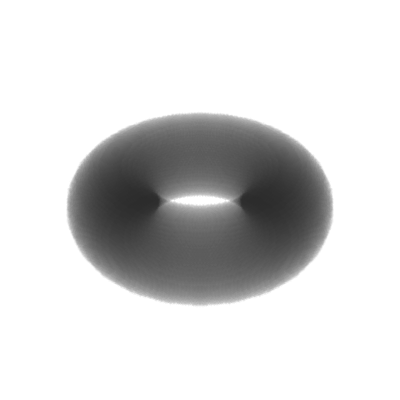

In [220]:
size = 400
p = project.visual.pyvista.pv.Plotter(window_size=(size,size))
p = project.visual.pyvista.plot_volume(bin_mask, bin_affine, cmap=['black'], clim=(0, 1), opacity=[0,0.04], plotter=p, show_scalar_bar=False)
#p = project.visual.pyvista.plot_mesh(src_mesh, color='lightblue', opacity=0.1, plotter=p, show_scalar_bar=False)
p.camera = cam
p.show(jupyter_backend='static')

# Preprocess surface mesh

In [221]:
project.preprocessing.api.preprocess_surface_mesh(
    input_path=ex.paths['source_mesh'],
    output_path=ex.paths['surface_mesh']
)

Loading ../../data/ShapeNetSem/models-OBJ/models/fabf4f7a56f75781c9c120e7b18610ad.obj
Repairing surface mesh
Initial mesh state:
dict(len=7)
├── 'vertices':     7056
├── 'faces':        2352
├── 'edges':        dict(len=3)
|   ├── 'boundary':    7056
|   ├── 'interior':    0
|   └── 'nonmanifold': 0
├── 'euler_number': 2352
├── 'watertight':   False
├── 'components':   2352
└── 'angles':       dict(len=3)
    ├── 'p05': 19.55253638482845
    ├── 'p50': 59.50566301467058
    └── 'p95': 96.92610535736159

After trimesh repair:
dict(len=7)
├── 'vertices':     576
├── 'faces':        1200
├── 'edges':        dict(len=3)
|   ├── 'boundary':    0
|   ├── 'interior':    1728
|   └── 'nonmanifold': 48
├── 'euler_number': 0
├── 'watertight':   False
├── 'components':   3
└── 'angles':       dict(len=3)
    ├── 'p05': 19.55242873289503
    ├── 'p50': 59.505510699201835
    └── 'p95': 96.9264228183694
Removed 1 small components
Patching holes...
Patched 2 holes
Fixing degeneracies and intersectio

WARNING- Some cuts were necessary to cope with non manifold configuration.


Done


Loading ../../data/ShapeNetSem/TEST/fabf4f7a56f75781c9c120e7b18610ad/meshes/surface.xdmf


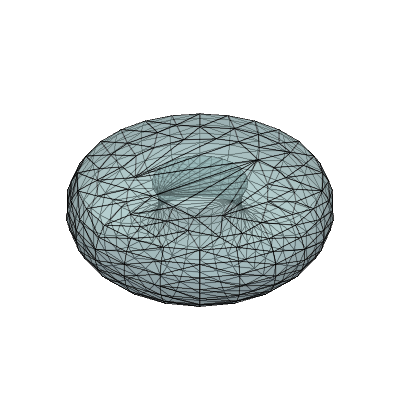

In [280]:
tri_mesh = project.core.fileio.load_meshio(ex.paths['surface_mesh'])

size = 400
p = pv.pv.Plotter(window_size=[size,size])
pv.plot_mesh(tri_mesh, color='lightblue', show_edges=True, opacity=0.5, plotter=p)
pv.plot_mesh(tri_mesh, style='wireframe', color='black', opacity=0.5, plotter=p)
p.camera = cam
p.show(jupyter_backend='static')

# Assign region labels

In [262]:
project.preprocessing.api.create_mesh_region_mask(
    mask_path=ex.paths['binary_mask'],
    mesh_path=ex.paths['source_mesh'],
    output_path=ex.paths['region_mask']
)

Loading ../../data/ShapeNetSem/TEST/fabf4f7a56f75781c9c120e7b18610ad/masks/binary.nii.gz
Loading ../../data/ShapeNetSem/models-OBJ/models/fabf4f7a56f75781c9c120e7b18610ad.obj
Extracting labels from mesh
Assigning labels to voxels
100%|██████████| 40/40 [00:26<00:00,  1.49it/s]
Cleaning up region mask
Filtering region 1
Input 1-connected components: 1
  Voxel counts:   [362776] 362776
Output 1-connected components: 1
  Voxels dropped: 0 (0.0000%)
Filtering region 2
Input 1-connected components: 1
  Voxel counts:   [32324] 32324
Output 1-connected components: 1
  Voxels dropped: 0 (0.0000%)
Saving ../../data/ShapeNetSem/TEST/fabf4f7a56f75781c9c120e7b18610ad/masks/regions.nii.gz
Done


Loading ../../data/ShapeNetSem/TEST/fabf4f7a56f75781c9c120e7b18610ad/masks/regions.nii.gz


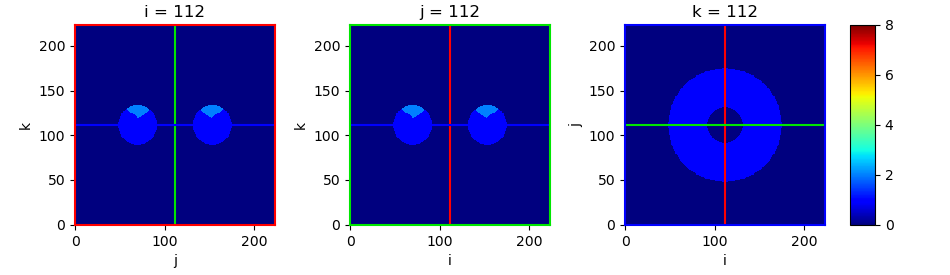

In [285]:
%autoreload
region_nifti = project.core.fileio.load_nibabel(ex.paths['region_mask'])
region_mask = region_nifti.get_fdata().astype(int)

fig = project.visual.matplotlib.show_image_slices(region_mask, cmap='jet', clim=(0, 8))

In [295]:
1 / np.histogram(region_mask, range=(0, 8), bins=9, density=True)[0]

/var/tmp/ipykernel_4275/1638174408.py:1: RuntimeWarning: divide by zero encountered in divide
  1 / np.histogram(region_mask, range=(0, 8), bins=9, density=True)[0]


array([  0.92127449,  27.53930555, 309.07681943,          inf,
                inf,          inf,          inf,          inf,
                inf])

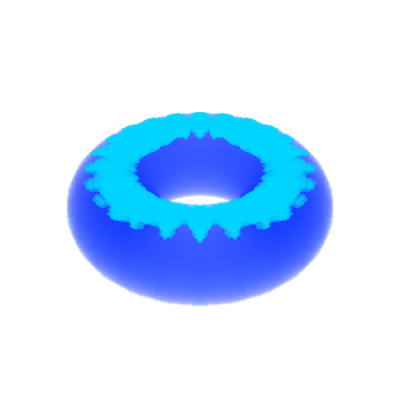

In [346]:
def _opacity(a, n, alpha=20000, relative=False):
    clim = (0, n - 1)
    freqs, edges = np.histogram(a, range=clim, bins=n, density=relative)
    sel = (freqs > 0) & (edges[:-1] > 0)
    opacity = np.zeros_like(freqs, dtype=float)
    opacity[sel] = np.minimum(alpha / freqs[sel], 1.0)
    return clim, opacity

clim, opacity = _opacity(region_mask, n=7)
p = project.visual.pyvista.pv.Plotter(window_size=(size,size))
p = project.visual.pyvista.plot_volume(region_mask, bin_affine, cmap='jet', clim=clim, opacity=opacity, plotter=p, show_scalar_bar=False)
#p = project.visual.pyvista.plot_volume(region_mask, bin_affine, cmap='jet', clim=(0, 8), opacity=opacity, plotter=p, show_scalar_bar=False)
#p = project.visual.pyvista.plot_mesh(src_mesh, style='wireframe', color='black', plotter=p, show_scalar_bar=False)
p.camera = cam
p.show(jupyter_backend='static')

# Generate volume mesh from region mask

In [348]:
project.preprocessing.api.create_volume_mesh_from_mask(
    mask_path=ex.paths['region_mask'],
    output_path=ex.paths['volume_mesh'],
    use_affine_spacing=False,
    pygalmesh_kws=dict(
        max_facet_distance=0.75,
        max_cell_circumradius=5.0,
        odt=True, lloyd=True,
    )
)

Loading ../../data/ShapeNetSem/TEST/fabf4f7a56f75781c9c120e7b18610ad/masks/regions.nii.gz
Generating volume mesh from mask
Removed 0 unreferenced point(s)
Mesh has 1 connected component(s)
<meshio mesh object>
  Number of points: 3845
  Number of cells:
    triangle: 10336
    tetra: 17686
  Point data: medit:ref
  Cell data: label
Saving ../../data/ShapeNetSem/TEST/fabf4f7a56f75781c9c120e7b18610ad/meshes/volume.xdmf
Done


Loading ../../data/ShapeNetSem/TEST/fabf4f7a56f75781c9c120e7b18610ad/meshes/volume.xdmf


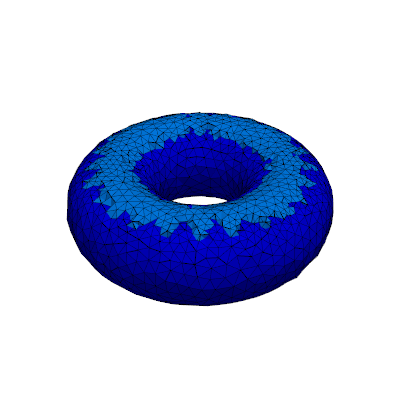

In [350]:
vol_mesh = project.core.fileio.load_meshio(ex.paths['volume_mesh'])

p = project.visual.pyvista.pv.Plotter(window_size=(size,size))
p = project.visual.pyvista.plot_mesh(vol_mesh, scalar='label', cmap='jet', clim=(0, 8), opacity=1.0, plotter=p, show_scalar_bar=False)
p = project.visual.pyvista.plot_mesh(vol_mesh, style='wireframe', color='black', plotter=p, show_scalar_bar=False)
p.camera = cam
p.show(jupyter_backend='static')

# Assign materials and properties

In [445]:
project.preprocessing.api.create_material_fields(
    mask_path=ex.paths['region_mask'],
    density_path=ex.paths['density_field'],
    elastic_path=ex.paths['elastic_field'],
    output_path=ex.paths['material_mask']
)

Loading ../../data/ShapeNetSem/TEST/fabf4f7a56f75781c9c120e7b18610ad/masks/regions.nii.gz
Assigning material properties to regions
Building material catalog
  density_key  density_val  density_freq elastic_key  elastic_val  \
0         0.0          0.0          0.00         0.0          0.0   
1       Dense        500.0          0.75        Hard       9000.0   
2       Dense        500.0          0.75      Medium       3000.0   
3       Dense        500.0          0.75        Soft       1000.0   
4      Porous        250.0          0.25        Hard       9000.0   
5      Porous        250.0          0.25      Medium       3000.0   
6      Porous        250.0          0.25        Soft       1000.0   

   elastic_freq  material_key  material_freq  poisson_ratio  
0          0.00    Background         0.0000            0.0  
1          0.25     DenseHard         0.1875            0.4  
2          0.50   DenseMedium         0.3750            0.4  
3          0.25     DenseSoft         0.18

# Forward FEM simulation

In [446]:
%autoreload
project.preprocessing.api.simulate_displacement_field(
    mesh_path=ex.paths['volume_mesh'],
    density_path=ex.paths['density_field'],
    elastic_path=ex.paths['elastic_field'],
    nodes_path=ex.paths['node_values'],
    output_path=ex.paths['disp_field'],
    unit_m=float(ex.metadata['unit'])
)

Loading ../../data/ShapeNetSem/TEST/fabf4f7a56f75781c9c120e7b18610ad/meshes/volume.xdmf
Loading ../../data/ShapeNetSem/TEST/fabf4f7a56f75781c9c120e7b18610ad/fields/density.nii.gz
Loading ../../data/ShapeNetSem/TEST/fabf4f7a56f75781c9c120e7b18610ad/fields/elasticity.nii.gz
Simulating displacement using material fields


RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [80]:
nifti = project.core.fileio.load_nibabel(ex.paths['region_mask'])
nifti

Loading ../../data/ShapeNetSem/TEST/101354f9d8dede686f7b08d9de913afe/masks/regions.nii.gz


In [78]:
fem_mesh = project.core.fileio.load_meshio(ex.paths['node_values'])
fem_mesh

Loading ../../data/ShapeNetSem/TEST/101354f9d8dede686f7b08d9de913afe/meshes/node_values.xdmf


<meshio mesh object>
  Number of points: 6778
  Number of cells:
    tetra: 32108
  Point data: E, mu, lam, rho, bc, u
  Cell data: label

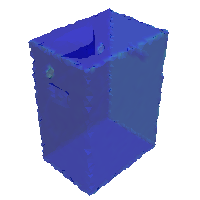

In [80]:
p = project.visual.pyvista.pv.Plotter(window_size=(200,200))
p = project.visual.pyvista.plot_mesh(fem_mesh, scalar='E', cmap='jet', clim=(0, 1e4), opacity=0.5, plotter=p, show_scalar_bar=False)
#p = project.visual.pyvista.plot_mesh(fem_mesh, style='wireframe', color='black', plotter=p, show_scalar_bar=False)
p.camera = cam
p.show(jupyter_backend='static')

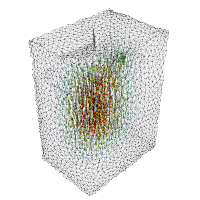

In [86]:
p = project.visual.pyvista.pv.Plotter(window_size=(200,200))
p = project.visual.pyvista.plot_mesh(fem_mesh, style='wireframe', color='black', plotter=p, opacity=0.1, show_scalar_bar=False)
p.add_mesh(project.visual.pyvista.pv.wrap(fem_mesh).glyph(scale='u', orient='u'), cmap='jet', show_scalar_bar=False)
p.camera = cam
p.show(jupyter_backend='static')

In [101]:
float(ex.metadata['unit'])

0.0136197560186615

# Texture annotations

In [15]:
import os
tex = pd.read_csv('texture_annotations_2025-10-21.csv')
tex.path = tex.path.map(os.path.abspath)

# manual corrections/additional annotations
tex.loc[[1, 76, 42], 'annotation'] = 'marble'
tex.loc[88, 'annotation'] = 'brick'
tex.loc[80, 'annotation'] = 'stone'
tex.loc[ 8, 'annotation'] = 'fiberboard'
tex.loc[[84, 90], 'annotation'] = 'grass'
tex.loc[97, 'annotation'] = 'stone'
tex.loc[ 3, 'annotation'] = 'cardboard'
tex.loc[[27, 72, 54, 89, 74, 73], 'annotation'] = 'paper'
tex.loc[[74, 100], 'annotation'] = 'fabric'
tex.loc[[34], 'annotation'] = 'stone'
tex.loc[[98, 103], 'annotation'] = 'gravel'
tex.loc[[56], 'annotation'] = 'paint'
tex.loc[[101], 'annotation'] = 'paper'

tex.loc[:, 'is_texture'] = True
tex.loc[[32, 82, 13, 41, 113, 33, 87, 7, 28, 20, 56, 3, 77], 'is_texture'] = False

tex.loc[:, 'is_duplicate'] = False
tex.loc[[10, 12, 29, 40, 57, 60, 61, 71, 95, 80, 51, 22, 105, 59, 94, 68, 69, 109, 110, 4, 23, 24, 36, 43, 47, 62, 79, 18, 26, 76, 90, 106, 38], 'is_duplicate'] = True

tex.loc[:, 'poor_quality'] = False
tex.loc[[5, 45, 17, 48, 67, 92, 83, 81, 53, 2, 16, 39, 88, 49, 21], 'poor_quality'] = True

tex.loc[:, 'bad_shape'] = False
tex.loc[[73, 89, 75, 97, 85, 19, 107, 100, 111], 'bad_shape'] = True

tex.loc[:, 'inverted'] = False
tex.loc[[55], 'inverted'] = True
tex

,idx,path,annotation,is_texture,is_duplicate,poor_quality,bad_shape,inverted
0,18231,/ocean/projects/asc170022p/mtragoza/lung-proje...,carpet,True,False,False,False,False
1,17033,/ocean/projects/asc170022p/mtragoza/lung-proje...,marble,True,False,False,False,False
2,18752,/ocean/projects/asc170022p/mtragoza/lung-proje...,wood,True,False,True,False,False
3,17435,/ocean/projects/asc170022p/mtragoza/lung-proje...,cardboard,False,False,False,False,False
4,3048,/ocean/projects/asc170022p/mtragoza/lung-proje...,wood,True,True,False,False,False
...,...,...,...,...,...,...,...,...
109,42,/ocean/projects/asc170022p/mtragoza/lung-proje...,wood,True,True,False,False,False
110,12807,/ocean/projects/asc170022p/mtragoza/lung-proje...,wood,True,True,False,False,False
111,5066,/ocean/projects/asc170022p/mtragoza/lung-proje...,wood,True,False,False,True,False
112,5531,/ocean/projects/asc170022p/mtragoza/lung-proje...,leather,True,False,False,False,False


In [16]:
texture_type_to_material = {
    'paper':   'DenseSoft',
    'leather': 'DenseMedium',
    'stone':   'DenseHard',
    'fabric':  'PorousSoft',
    'wood':    'PorousMedium',
    'marble':  'PorousHard'
}
is_valid = tex.is_texture & ~(tex.is_duplicate | tex.poor_quality | tex.bad_shape)
tex.loc[is_valid, 'material'] = tex.annotation.map(texture_type_to_material)
tex.groupby('material').count()

,idx,path,annotation,is_texture,is_duplicate,poor_quality,bad_shape,inverted
material,,,,,,,,
DenseHard,3,3,3,3,3,3,3,3
DenseMedium,4,4,4,4,4,4,4,4
DenseSoft,4,4,4,4,4,4,4,4
PorousHard,3,3,3,3,3,3,3,3
PorousMedium,4,4,4,4,4,4,4,4
PorousSoft,4,4,4,4,4,4,4,4


In [17]:
#tex.to_csv(ds.root / 'texture_annotations_2025-10-25.csv', index=False)

In [18]:
%pwd

'/ocean/projects/asc170022p/mtragoza/lung-project/notebooks/shapenet'

6 4


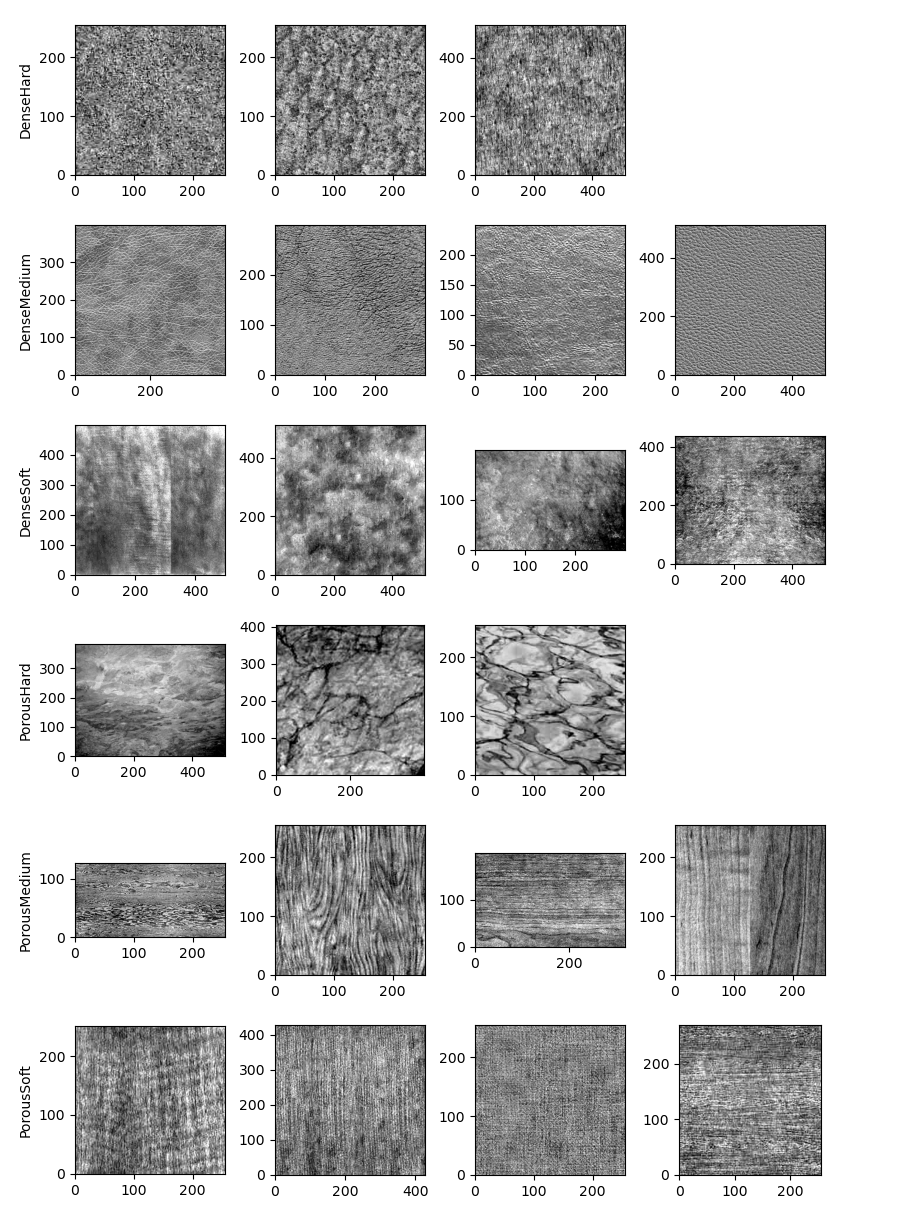

In [285]:
tex_cache = project.preprocessing.texturing.build_texture_cache(
    path=ds.root / 'texture_annotations_2025-10-25.csv',
    iqr_mult=4.0
)
_ = project.preprocessing.texturing.show_textures(tex_cache.dropna().set_index('material'))

# Image generation

In [138]:
%autoreload
import project.preprocessing.texturing

project.preprocessing.api.generate_volumetric_image(
    mask_path=ex.paths['material_mask'],
    output_path=ex.paths['input_image'],
    annot_path='2025-10-25_annotations.csv',
    tex_kws=dict(iqr_mult=4.0),
    gen_kws=dict(

        # image parameters
        bias_0=-1000.,
        bias_d=1000.,
        bias_e=0.,
        range_0=250.,
        range_d=0.,
        range_e=250.,

        # noise parameters
        t_noise_corr=1.,
        t_noise_std=0.1,
        b_noise_corr=64.,
        b_noise_std=0.1,
        s_noise_std=10.,
    
        weights=[0.,0.,1],
        seed=0,
    )
)

Loading ../../data/ShapeNetSem/TEST/100f39dce7690f59efb94709f30ce0d2/masks/material.nii.gz


FileNotFoundError: No such file or no access: '../../data/ShapeNetSem/TEST/100f39dce7690f59efb94709f30ce0d2/masks/material.nii.gz'

Loading ../../data/ShapeNetSem/TEST/101354f9d8dede686f7b08d9de913afe/images/generated.nii.gz


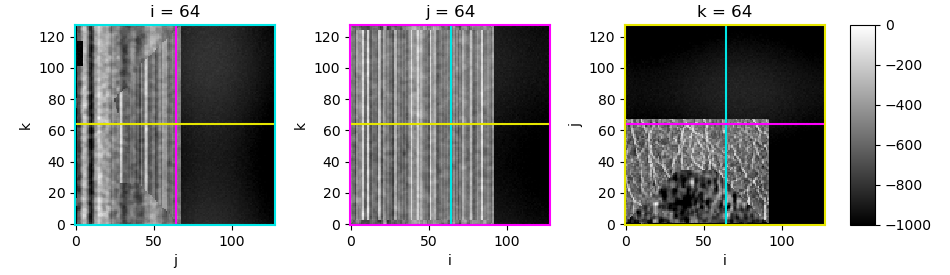

In [151]:
%matplotlib widget
import project.visual.matplotlib

nifti = project.core.fileio.load_nibabel(ex.paths['input_image'])
image = nifti.get_fdata()

fig = project.visual.matplotlib.show_image_slices(image, cmap='gray', clim=(-1000, 0), colors='cmy')

In [71]:
class SIREN(torch.nn.Module):
    def __init__(self, n_input=3, n_output=1, n_hidden=128):
        super().__init__()
        self.l1 = torch.nn.Linear(n_input, n_hidden)
        self.l2 = torch.nn.Linear(n_hidden, n_hidden)
        self.l3 = torch.nn.Linear(n_hidden, n_hidden)
        self.l4 = torch.nn.Linear(n_hidden, n_hidden)
        self.l5 = torch.nn.Linear(n_hidden, n_output)

    def forward(self, x):
        x = torch.sin(self.l1(x))
        x = torch.sin(self.l2(x))
        x = torch.sin(self.l3(x))
        x = torch.sin(self.l4(x))
        return self.l5(x)

    def init_weights(self, w0=30, c=6):
        for i, m in enumerate(self.children()):
            fan_in = m.weight.shape[-1]
            scale = w0 / fan_in if i == 0 else -np.sqrt(c / fan_in)
            m.weight.uniform_(-scale, scale)

model = SIREN()
model

SIREN(
  (l1): Linear(in_features=3, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=128, bias=True)
  (l3): Linear(in_features=128, out_features=128, bias=True)
  (l4): Linear(in_features=128, out_features=128, bias=True)
  (l5): Linear(in_features=128, out_features=1, bias=True)
)

In [81]:
texture = texture_cache['DenseMedium']['../../data/ShapeNetSem/models-textures/textures/8a1b661a4dd6aa56.jpg']
pprint(texture, 0)

ndarray(shape=(400, 400), dtype=float64)


In [87]:
texture.shape

(400, 400)

In [99]:
class SliceDataset(torch.utils.data.Dataset):
    def __init__(self, dim_size, dtype=torch.float32, device='cuda'):
        coords = torch.linspace(-1, 1, dim_size, dtype=dtype, device=device)
        self.U, self.V = torch.meshgrid(coords, coords, indexing='ij')
        self.slices = []
        for slice_dim in range(3):
            for slice_coord in coords:
                self.slices.append([slice_dim, slice_coord])

    def __len__(self):
        return len(self.slices)

    def __getitem__(self, idx):
        slice_dim, slice_coord = self.slices[idx]
        slice_coord = torch.full_like(self.U, slice_coord)
        if slice_dim == 0:
            points = torch.stack([slice_coord, self.U, self.V], dim=-1)
        elif slice_dim == 1:
            points = torch.stack([self.U, slice_coord, self.V], dim=-1)
        elif slice_dim == 2:
            points = torch.stack([self.U, self.V, slice_coord], dim=-1)
        return points.reshape(-1, 3)

data = SliceDataset(dim_size=128)
len(data)

384

In [100]:
def train(model, data, batch_size=1, lr=1e-4):
    optim = torch.optim.Adam([model.parameters()], lr=lr)
    data_loader = torch.utils.data.DataLoader(data, batch_size=1, shuffle=True)
    for i, points in enumerate(data_loader):
        print(points.shape, flush=True)

train(model, data)

AttributeError: module 'triton.language' has no attribute 'core'

# Signed distance functions

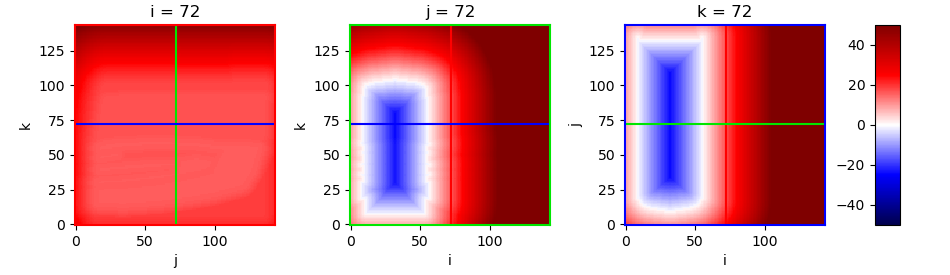

In [50]:
import scipy
def convert_binary_mask_to_sdf(input_mask):
    a = (input_mask != 0)
    d_out = scipy.ndimage.distance_transform_edt(~a)
    d_in  = scipy.ndimage.distance_transform_edt(a)
    return d_out - d_in

sdf_array = convert_binary_mask_to_sdf(padded_array)

fig = project.visual.matplotlib.show_image_slices(sdf_array, cmap='seismic', clim=(-50, 50))

In [51]:
import skimage
def generate_surface_from_sdf(sdf_array, affine, step_size):
    v, f, n, _ = skimage.measure.marching_cubes(sdf_array, level=0, allow_degenerate=False, step_size=step_size)
    v = project.core.transforms.voxel_to_world_coords(v, affine)
    return v, f

v, f = generate_surface_from_sdf(sdf_array, padded_affine, step_size=2)
sdf_mesh = trimesh.Trimesh(vertices=v, faces=f, process=False)
sdf_mesh.is_watertight

True

In [52]:
p = pv.Plotter()
p.add_mesh(pv.wrap(sdf_mesh), color='blue', opacity=0.5, show_edges=True)
p.enable_depth_peeling(10)
p.show(jupyter_backend='trame')

Widget(value='<iframe id="pyvista-jupyter_trame__template_P_0x14bed798df90_10" src="https://ondemand.bridges2.…

In [339]:
labels, counts = np.unique(output_array, return_counts=True)
pprint(counts)

opacity = np.zeros(9, dtype=float)
opacity[labels] = np.minimum(25000 / counts, 1.0)
opacity[0] = 0
pprint(opacity)

ndarray(shape=(4,), dtype=int64)
├── 0: np.int64(1567366)
├── 1: np.int64(95970)
├── 2: np.int64(212257)
└── 3: np.int64(221559)
ndarray(shape=(9,), dtype=float64)
├── 0: np.float64(0.0)
├── 1: np.float64(0.26049807231426486)
├── 2: np.float64(0.11778174571392228)
├── 3: np.float64(0.11283676131414205)
├── 4: np.float64(0.0)
├── 5: np.float64(0.0)
├── 6: np.float64(0.0)
├── 7: np.float64(0.0)
└── 8: np.float64(0.0)


In [341]:
pv_grid = pv.ImageData(
    dimensions=bin_array.shape,
    spacing=np.linalg.norm(affine[:3,:3], axis=1),
    origin=affine[:3,3]
)
pv_grid.point_data['mask'] = bin_array.flatten(order='F').astype(int)
pv_grid.point_data['label'] = output_array.flatten(order='F').astype(int)

p = pv.Plotter()
p.add_volume(
    pv_grid,
    scalars='label',
    cmap='jet',
    clim=(0, 8),
    opacity=opacity
)
p.enable_depth_peeling(10)
p.show()

Widget(value='<iframe id="pyvista-jupyter_trame__template_P_0x154c39c22c10_72" src="https://ondemand.bridges2.…

# Batch preprocessing

In [5]:
import sys
import pandas as pd

sys.path.append('../../../param_search')
import param_search as ps

ps.set_verbose(False)
ps.set_backend('slurm')

In [6]:
csv_path = '2025-11-02_selected.csv'
sel = pd.read_csv(csv_path)
sel

,subject,metadata.category.set,metadata.category.len,metadata.category.set_f,metadata.category.len_f,metadata.category.valid,metadata.category.reasons,metadata.unit.value,metadata.unit.valid,metadata.unit.reasons,...,artifacts.valid,artifacts.reasons,valid,reasons,artifacts.scene.exc,paths.source_mask.exc,source_path,job_name,job_id,dims_error
0,wss.100f39dce7690f59efb94709f30ce0d2,"{'Recliner', 'Chair'}",2,"{'Recliner', 'Chair'}",2,True,(),0.012947,True,(),...,True,(),True,(),NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,0103f8f8d5c25bf7,35732758,7.294375e-08
1,wss.101354f9d8dede686f7b08d9de913afe,"{'Speaker', '_Attributes'}",2,{'Speaker'},1,True,(),0.013620,True,(),...,True,(),True,(),NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,0103f8f8d5c25bf7,35732758,1.319075e-08
2,wss.1029fd5d71a06ea32ea98d69e91ba870,{'ChestOfDrawers'},1,{'ChestOfDrawers'},1,True,(),0.019631,True,(),...,True,(),True,(),NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,0103f8f8d5c25bf7,35732758,8.319422e-08
3,wss.102a6b7809f4e51813842bc8ef6fe18,"{'Desktop', 'Computer'}",2,"{'Desktop', 'Computer'}",2,True,(),0.025252,True,(),...,True,(),True,(),NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,0103f8f8d5c25bf7,35732758,1.077898e-07
4,wss.107637b6bdf8129d4904d89e9169817b,{'Couch'},1,{'Couch'},1,True,(),0.022625,True,(),...,True,(),True,(),NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,0103f8f8d5c25bf7,35732758,7.520307e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,wss.d81f943065391492a7e760c0b399301,"{'FoodItem', 'Bowl', '_StanfordSceneDBModels',...",4,"{'FoodItem', 'Bowl', 'FruitBowl'}",3,True,(),0.001381,True,(),...,True,(),False,"('missing dims',)",NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,5c023e2f832d4dcf,35732849,NaN
1112,wss.d8d4004791c4f61b80fa98b5eeb7036c,"{'_StanfordSceneDBModels', 'Book'}",2,{'Book'},1,True,(),0.000002,True,(),...,True,(),False,"('missing dims',)",NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,5c023e2f832d4dcf,35732849,NaN
1113,wss.e8add7acb28e2505fd40810f48721e8b,"{'Bed', 'DoubleBed'}",2,"{'Bed', 'DoubleBed'}",2,True,(),0.009245,True,(),...,True,(),False,"('missing dims',)",NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,5c023e2f832d4dcf,35732849,NaN
1114,wss.f6420a3a3addd027f67be63aca8832dd,"{'Recliner', 'Chair'}",2,"{'Recliner', 'Chair'}",2,True,(),0.027262,True,(),...,True,(),False,"('missing dims',)",NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,8786de37533664e5,35732850,NaN


In [7]:
base_dir = '2025-11-02_preprocess'

template = '''\
#!/bin/bash -l
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:1
#SBATCH -t 24:00:00
set -eo pipefail

LP=$PROJECT/lung-project
NB=$PROJECT/lung-project/notebooks/shapenet

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/preprocess.py --dataset shapenet --data_root $LP/data/ShapeNetSem --variant {variant} --config $NB/{config} --subject {subject}

'''
name_format = '{params_hash}'

grid = ps.param_grid(subject=sel.subject, variant='2025-11-02', config='2025-11-02_config.json')
len(grid)

1116

In [8]:
%autoreload
try:
    jobs = ps.setup(base_dir, template, name_format, grid, overwrite=False)
except OSError:
    jobs = ps.load(base_dir)
jobs

,job_name,job_state,n_submits,job_id,node_id,runtime,stdout,stderr,base_dir,work_dir,...,params.config,output_exists,output_fsize,output_mtime,array_idx,last_live_at,state_source,finalized,finalized_at,error_line
0,29ce194442049995,COMPLETED,1,35760489,v031,00:01:28,Module warp.fem.space.restriction.dyn.fill_ele...,Total optimization time: 9.98211s\n\nRunning s...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2025-11-02_config.json,False,None,None,NaN,2025-11-02T20:25:30,history,True,2025-11-02T20:29:56,None
1,14808a4dca193cc6,COMPLETED,1,35760490,v031,00:01:38,"(224, 224, 224, 3) float32\nE (6846, 1) float3...",Total optimization time: 9.29207s\n\nRunning s...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2025-11-02_config.json,False,None,None,NaN,2025-11-02T20:25:30,history,True,2025-11-02T20:29:56,None
2,80b6d4fad5d281e2,COMPLETED,1,35760491,v031,00:02:23,Module warp.fem.space.restriction.dyn.fill_ele...,Total optimization time: 3.41252s\n\nRunning s...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2025-11-02_config.json,False,None,None,NaN,2025-11-02T20:29:56,history,True,2025-11-02T20:33:26,None
3,dad19a9da26c0152,COMPLETED,1,35760492,v018,00:04:09,"E (7190, 1) float32\nmu (7190, 1) float32\nlam...",Total optimization time: 17.0064s\n\nRunning s...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2025-11-02_config.json,False,None,None,NaN,2025-11-02T20:33:26,history,True,2025-11-02T21:14:03,None
4,6367e780f09371ad,COMPLETED,1,35760493,w008,00:03:46,Module warp.fem.space.restriction.dyn.fill_ele...,Total optimization time: 5.37212s\n\nRunning s...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2025-11-02_config.json,False,None,None,NaN,2025-11-02T20:33:26,history,True,2025-11-02T21:14:03,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,4e863fd445db4f39,COMPLETED,1,35761601,v025,00:01:12,"(224, 224, 224, 3) float32\nE (6884, 1) float3...",Total optimization time: 11.9461s\n\nRunning s...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2025-11-02_config.json,False,None,None,NaN,2025-11-02T21:14:01,history,True,2025-11-03T12:09:17,None
1112,c1a80e8d8e56ce2a,COMPLETED,1,35761602,v025,00:04:11,Module warp.fem.integrate._identity_field__itp...,Total optimization time: 102.319s\n\nRunning s...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2025-11-02_config.json,False,None,None,NaN,2025-11-02T21:14:01,history,True,2025-11-03T12:09:17,None
1113,9b515b94d1331bc5,COMPLETED,1,35761603,v029,00:01:25,Rasterizing output field\nModule warp.fem.spac...,Total optimization time: 24.5643s\n\nRunning s...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2025-11-02_config.json,False,None,None,NaN,2025-11-02T21:14:01,history,True,2025-11-03T12:09:17,None
1114,8a767031556adad6,COMPLETED,1,35761604,v029,00:02:06,Rasterizing output field\nModule warp.fem.spac...,Total optimization time: 9.52996s\n\nRunning s...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2025-11-02_config.json,False,None,None,NaN,2025-11-02T21:14:01,history,True,2025-11-03T12:09:17,None


In [9]:
%autoreload
jobs = ps.recover(jobs)
jobs = ps.status(jobs)
jobs = ps.history(jobs)
jobs = ps.collect(jobs)
jobs.groupby(['job_state']).count()

,job_name,n_submits,job_id,node_id,runtime,stdout,stderr,base_dir,work_dir,script_path,...,params.config,output_exists,output_fsize,output_mtime,array_idx,last_live_at,state_source,finalized,finalized_at,error_line
job_state,,,,,,,,,,,,,,,,,,,,,
COMPLETED,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,...,1085,1085,0,0,0,1085,1085,1085,1085,0
FAILED,31,31,31,31,31,31,31,31,31,31,...,31,31,0,0,0,31,31,31,31,0


In [23]:
print(jobs[jobs.job_state == 'FAILED'].iloc[300].stderr)

Total exuding time: 1.00002s
Exuding return code: TIME_LIMIT_REACHED

Traceback (most recent call last):
  File "/ocean/projects/asc170022p/mtragoza/lung-project/preprocess.py", line 63, in <module>
    main(sys.argv[1:])
  File "/ocean/projects/asc170022p/mtragoza/lung-project/preprocess.py", line 59, in main
    run_pipeline(ex, pipeline_cfg)
  File "/ocean/projects/asc170022p/mtragoza/lung-project/project/preprocessing/api.py", line 103, in preprocess_shapenet
    _check_output(
  File "/ocean/projects/asc170022p/mtragoza/lung-project/project/preprocessing/api.py", line 18, in _check_output
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/ocean/projects/asc170022p/mtragoza/lung-project/project/preprocessing/api.py", line 347, in simulate_displacement_field
    from . import simulation
  File "/ocean/projects/asc170022p/mtragoza/lung-project/project/preprocessing/simulation.py", line 127
    def _optimize_lbfgs(closure, param, max_iter=100, tol=1e-3, eps=1e-

In [24]:
# mark failed jobs to resubmit
jobs.loc[(jobs.job_state == 'FAILED'), 'job_id'] = pd.NA

In [25]:
%autoreload
jobs = ps.submit(jobs)